In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
from collections import Counter
from Bio import SeqIO

import sys
sys.path.append('../..')
from src.utils.parse_cas_operon_tab import parse_cas_operon_tab
from src.utils.parse_crispr_all_tab import parse_crispr_all_tab

# Plot the distributions of the Cas-system types found in the archaeal genomes

In [78]:
def plot_distributions(data):
    """
    Dict containing {
        "type_name": abundance
    }
    """
    data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))
    names = list(data.keys())
    values = list(data.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values)

    plt.xlabel("Type")
    plt.ylabel("Abundance")
    plt.title("Distribution Histogram")
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

def retrieve_cas_system_types_found(res_dir : str):
    """
    """
    subfolders = os.listdir(res_dir)
    all_cas_systems_found = []
    
    for sub in subfolders:
        cas_operon_path = os.path.join(res_dir, sub, "cas_operons.tab")

        if os.path.exists(cas_operon_path):
            res = parse_cas_operon_tab(cas_operon_path)
            cas_systems_found = res["Prediction"]
            all_cas_systems_found.extend(cas_systems_found)

        else:
            print(f"No cas_operon.tab file in {sub}")

    return all_cas_systems_found

No cas_operon.tab file in 2053491.96
No cas_operon.tab file in 2053489.176
No cas_operon.tab file in 2026747.123


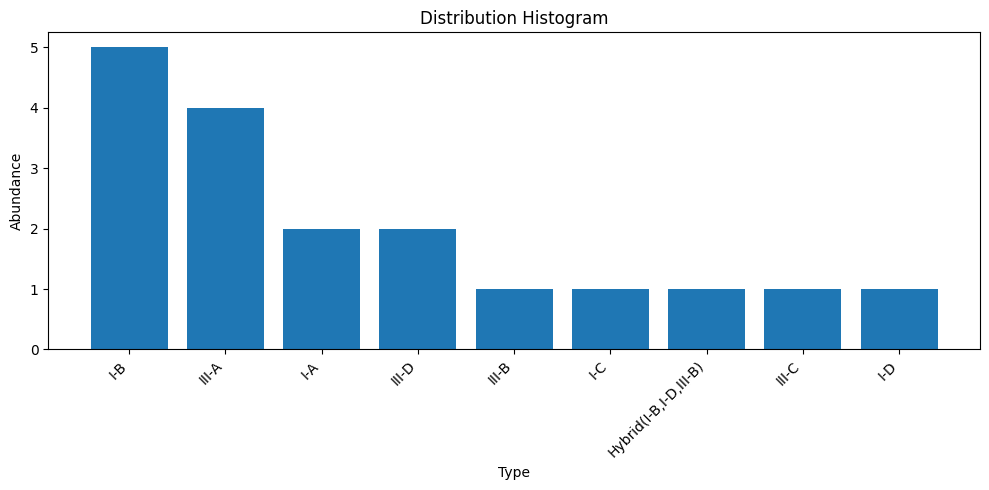

In [79]:
# ASGARD
path = "asgard"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

No cas_operon.tab file in 2886383.12
No cas_operon.tab file in 2026736.82
No cas_operon.tab file in 2099673.6
No cas_operon.tab file in 2026803.482


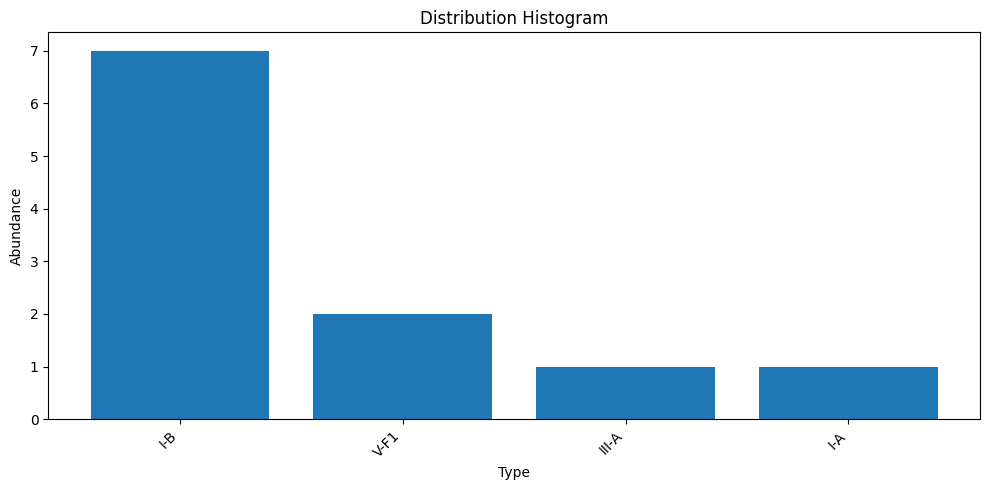

In [80]:
# DPANN
path = "dpann"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

No cas_operon.tab file in 2026739.72


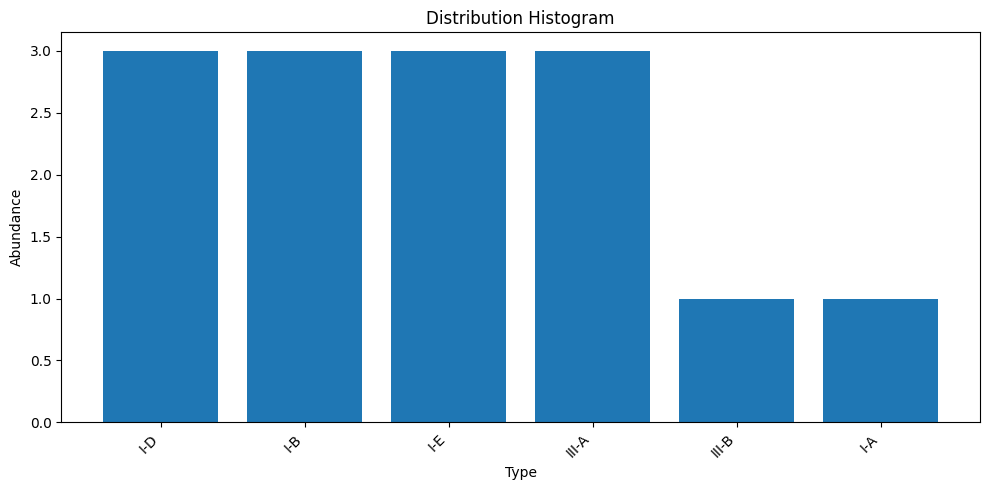

In [81]:
# EURY
path = "eury"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

No cas_operon.tab file in 2202732.11
No cas_operon.tab file in 2184738.154


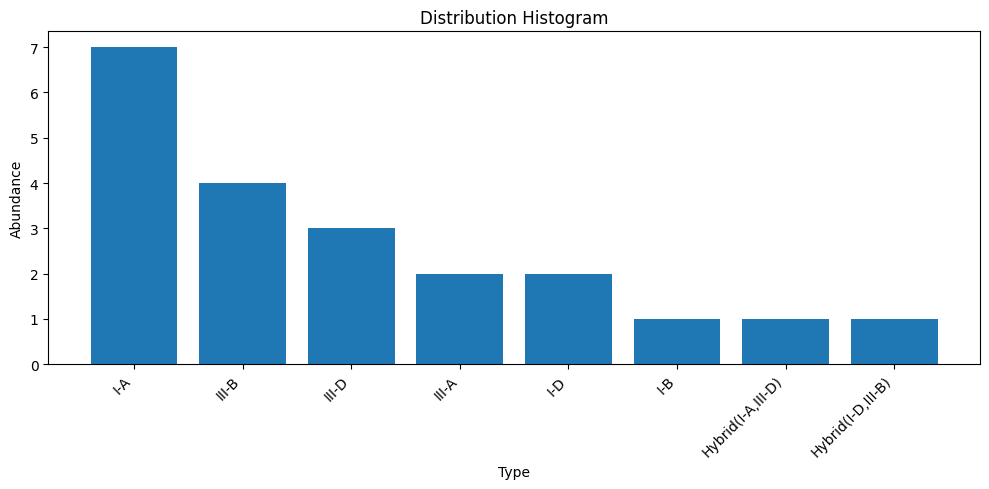

In [82]:
#  TACK
path = "tack"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

# Using any CRISPR-arrays found, how many spacers are possible in the dataset? 
For example the histogram on the bottom of the scatterplot is the number shows the distribution of the number of spacers per genome across all genomes in the dataset 

In [ ]:
def retrieve_n_repeats(res_dir : str):
    """
    """
    subfolders = os.listdir(res_dir)
    n_repeats = 0
    for sub in subfolders:
        crisprs_all_path = os.path.join(res_dir, sub, "crisprs_all.tab")
        
        repeats = get_n_repeats_per_file(crisprs_all_path)
        n_repeats += repeats

    return int(n_repeats)

def get_n_repeats_per_file(path : str):
    if os.path.exists(path):
        res = parse_crispr_all_tab(path)
        tmp_sum = res["N_repeats"].sum()
        n_repeats = tmp_sum

    else:
        print(f"No crispr_all.tab file in {path}") 
    return n_repeats 

def retrieve_spacer_amount(res_dir : str):
    """
    """
    subfolders = os.listdir(res_dir)
    n_spacer = 0
    for sub in subfolders:
        spacer_dir_path = os.path.join(res_dir, sub, "spacers")
        for fasta_file in os.listdir(spacer_dir_path):
            n_spacer += get_n_spacer_from_fasta(os.path.join(spacer_dir_path, fasta_file))
        
    return int(n_spacer)

def get_n_spacer_from_fasta(path : str):
    """
    """
    n_spacer = 0
    for record in SeqIO.parse(path, "fasta"):
        n_spacer += 1
    return n_spacer

def retrieve_n_spacer_and_n_repeats_for_dir(path : str):
    """"""
    return retrieve_spacer_amount(path), retrieve_n_repeats(path)

def retrieve_n_spacer_and_n_repeats_for_genome(path : str):
    """"""
    crispr_all_path = os.path.join(path, "crisprs_all.tab")
    if not os.path.exists(crispr_all_path):
        return 0,0
    n_repeats = get_n_repeats_per_file(crispr_all_path)

    spacer_dir_path = os.path.join(path, "spacers")
    n_spacer = 0
    if os.path.exists(spacer_dir_path):
        for fasta_file in os.listdir(spacer_dir_path):
            tmp_spacer = get_n_spacer_from_fasta(os.path.join(spacer_dir_path, fasta_file)) 
            n_spacer += tmp_spacer
    else:
        raise ValueError(f"{spacer_dir_path} does not exist")

    return n_repeats, n_spacer

def plot_scatter_with_line(data, title = None):
    """
    Plots a scatter plot from a list of (x, y) tuples and adds a line where x = y.
    
    Parameters:
        data (list of tuples): List containing tuples (x, y)
    """
    # Unpack data into x and y coordinates
    x_vals, y_vals = zip(*data)

    # Erstelle den Scatterplot
    plt.figure(figsize=(6, 6))
    plt.scatter(x_vals, y_vals, label="Data Points", color='blue')

    # Füge die Linie x = y hinzu
    plt.plot([min(x_vals), max(x_vals)], [min(x_vals), max(x_vals)], 'r--', label="x = y")

    # Achsenbeschriftungen und Titel
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    if title is None:
        plt.title("Scatter Plot with x = y Line")
    else:
        plt.title(title)

    # Zeige Legende
    plt.legend()

    # Achsen gleich skalieren
    plt.axis('equal')

    # Zeige den Plot an
    plt.show()

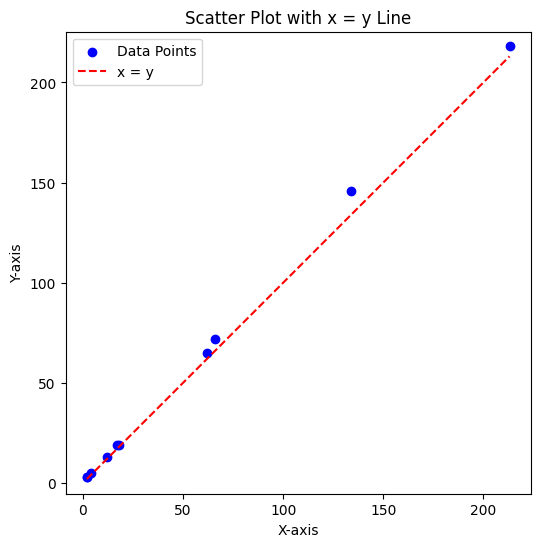

In [84]:
# asgard
path = "asgard"
data_points = []
for genome in os.listdir(path):
    n_repeats, n_spacer = retrieve_n_spacer_and_n_repeats_for_genome(os.path.join(path, genome))
    data_points.append((n_spacer, n_repeats))
plot_scatter_with_line(data_points)

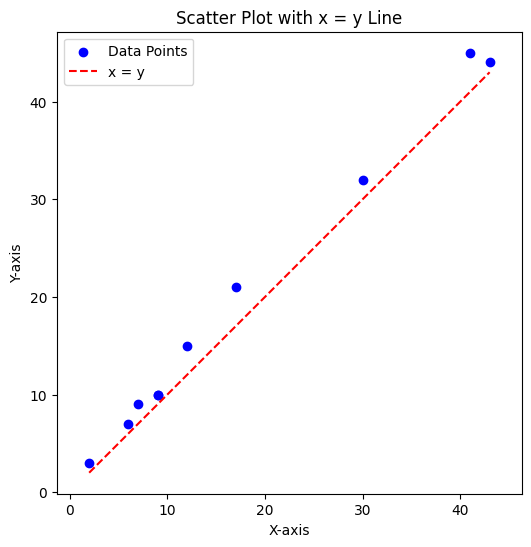

In [85]:
# dpann
path = "dpann"
data_points = []
for genome in os.listdir(path):
    n_repeats, n_spacer = retrieve_n_spacer_and_n_repeats_for_genome(os.path.join(path, genome))
    data_points.append((n_spacer, n_repeats))
plot_scatter_with_line(data_points)

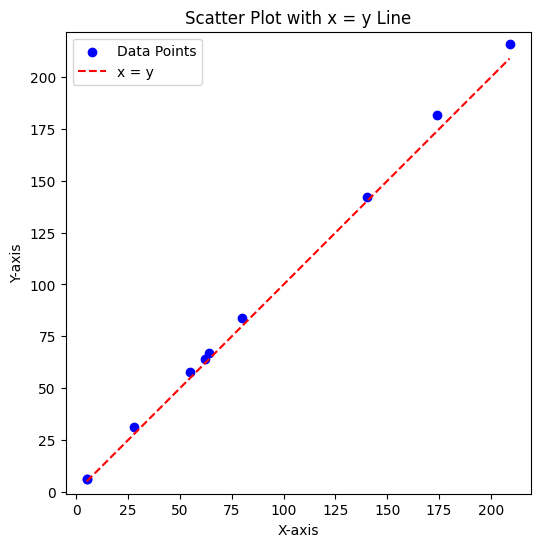

In [86]:
# eury
path = "eury"
data_points = []
for genome in os.listdir(path):
    n_repeats, n_spacer = retrieve_n_spacer_and_n_repeats_for_genome(os.path.join(path, genome))
    data_points.append((n_spacer, n_repeats))
plot_scatter_with_line(data_points)

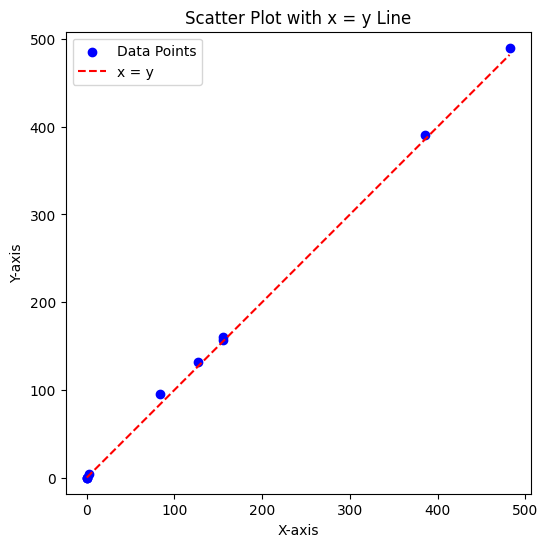

In [87]:
# tack
path = "tack"
data_points = []
for genome in os.listdir(path):
    n_repeats, n_spacer = retrieve_n_spacer_and_n_repeats_for_genome(os.path.join(path, genome))
    data_points.append((n_spacer, n_repeats))
plot_scatter_with_line(data_points)

# what is the average length (in nucleotides) of the spacers found? 

In [101]:
def get_avg_spacer_length_from_fasta(fasta_path : str):
    """
    """
    n = 0
    len_sum = 0
    for record in SeqIO.parse(fasta_path, "fasta"):
        n += 1
        len_sum += len(str(record.seq))
    
    return len_sum/n, len_sum, n

def get_avg_spacer_length_for_genome(genome_path : str):
    """
    """
    spacer_path = os.path.join(genome_path, "spacers")
    if not os.path.exists(spacer_path):
        return 0.0
    len_sum = 0
    n = 0
    for fasta in os.listdir(spacer_path):

        _, one_len_sum, one_n = get_avg_spacer_length_from_fasta(os.path.join(spacer_path, fasta))
        len_sum += one_len_sum
        n += one_n

    return len_sum/n   

In [102]:
# asgard
path = "asgard"
for genome in os.listdir(path):
    print(get_avg_spacer_length_for_genome(os.path.join(path, genome)))

38.111111111111114
36.72300469483568
38.78358208955224
41.5
33.0
44.529411764705884
37.583333333333336
49.0
38.34848484848485
37.88709677419355


In [103]:
# dpann
path = "dpann"
for genome in os.listdir(path):
    print(get_avg_spacer_length_for_genome(os.path.join(path, genome)))

35.266666666666666
37.22222222222222
36.5
36.35294117647059
37.22222222222222
37.166666666666664
44.0
41.41860465116279
37.73170731707317
37.0


In [104]:
# eury
path = "eury"
for genome in os.listdir(path):
    print(get_avg_spacer_length_for_genome(os.path.join(path, genome)))

35.86124401913876
37.775
31.992857142857144
35.37096774193548
43.0
37.18390804597701
38.5
35.8
36.49090909090909
31.921875


In [105]:
# tack
path = "tack"
for genome in os.listdir(path):
    print(get_avg_spacer_length_for_genome(os.path.join(path, genome)))

39.13548387096774
0.0
40.84251968503937
41.79761904761905
0.0
0.0
35.47741935483871
38.99792531120332
40.13212435233161
33.0
